# AirBnB NY Locations Data Case Study

In this final project, you task will be to take the data provided and find evidence to answer the following questions.

1. How many neighborhood groups are there and which shows up the most?
2. Are private rooms the most popular in Manhattan?
3. Who are the top 10 busiest hosts based on number of reviews per month?
4. Which neighorhood group has the highest average price? Plot the average prices in a professional looking bar chart
5. What is the most expensive neighbourhood in each neighbourhood group?
6. Which host has the highest minimum rental? *minimal rental is based on price and minimum nights
7. Who currently has no (zero) availability with a review count of 100 or more?
8. If each host rents all of their properties for the night, which 5 make the most that night?
9. When did Danielle from Queens last receive a review?
10. Display a bar chart showing the number of each type of room in the Bronx

You will be given **4 hours** to complete this assignment. 
**Be Advised** I will go dark for this entire assignment time period. That said, any questions that you would like to ask about the data, or the project **MUST** be asked before the time starts. Once the time has started, I can no longer give information.

This is to simulate what you will face when you are out in the wild. 

Happy Coding!

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
air_bnb = pd.read_csv('./AB_NYC_2019.csv')
air_bnb.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [120]:
# How many neighbourhood groups / which shows up the most

ques_1 = air_bnb.groupby('neighbourhood_group').count()

ques_1[['id', 'name', 'host_id', 'host_name']]


# There are 5 neighbourhood groups & Manhattan shows up the most

,id,name,host_id,host_name
neighbourhood_group,,,,
Bronx,1091,1090,1091,1090
Brooklyn,20104,20098,20104,20095
Manhattan,21661,21652,21661,21652
Queens,5666,5666,5666,5664
Staten Island,373,373,373,373


In [101]:
# Are private rooms the most popular in Manhattan? 

pt1 = air_bnb[(air_bnb['neighbourhood_group']== 'Manhattan' )]

ques_2 = pt1.value_counts('room_type')

ques_2


# Entire home/apt are the most popular in Manhattan

room_type
Entire home/apt    13199
Private room        7982
Shared room          480
dtype: int64

In [65]:
# Who are the top 10 busiest hosts based on number of reviews per month?
ques_3 = air_bnb[[ 'name', 'host_name', 'reviews_per_month']].sort_values('reviews_per_month', axis=0, ascending=False).reset_index()

ques_3.head(10)

# The top 10 hosts are down below.


,index,name,host_name,reviews_per_month
0,42075,Enjoy great views of the City in our Deluxe Room!,Row NYC,58.50
1,42076,Great Room in the heart of Times Square!,Row NYC,27.95
2,38870,Lou's Palace-So much for so little,Louann,20.94
3,27287,JFK Comfort.5 Mins from JFK Private Bedroom & ...,Nalicia,19.75
4,28651,JFK 2 Comfort 5 Mins from JFK Private Bedroom,Nalicia,17.82
5,29628,JFK 3 Comfort 5 Mins from JFK Private Bedroom,Nalicia,16.81
6,20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,Danielle,16.22
7,22469,Cute Tiny Room Family Home by LGA NO CLEANING FEE,Danielle,16.03
8,36238,“For Heaven Cakes”,Brent,15.78
9,40297,Studio Apartment 6 minutes from JFK Airport,Lakshmee,15.32


<AxesSubplot:>

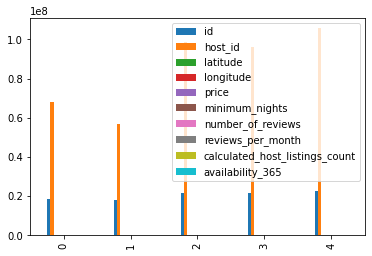

In [81]:
# Which neighborhood group has the highest avg price and plot the average prices in a bar chart
ques_4 = air_bnb.groupby('neighbourhood_group').mean().sort_values('price', axis=0, ascending=False).reset_index()

ques_4.plot.bar()

# Manhattan has the highest avg price 

In [83]:
# What is the most expensive neighbourhood in each neighbourhood_group
ques_4 = air_bnb[['neighbourhood_group', 'neighbourhood', 'price']].groupby('neighbourhood_group').max()

ques_4

# The most expensive neighbourhood in each neighbourhood_group 

,neighbourhood,price
neighbourhood_group,,
Bronx,Woodlawn,2500
Brooklyn,Windsor Terrace,10000
Manhattan,West Village,10000
Queens,Woodside,10000
Staten Island,Woodrow,5000


In [126]:
# Which host has the highest minimum rental? *minimal rental is based on price and minimum nights

air_bnb['highest_minimum_rental'] = air_bnb['price'] * air_bnb['minimum_nights']

air_bnb[['name', 'host_name', 'highest_minimum_rental']].sort_values('highest_minimum_rental', axis=0, ascending=False).head(5)

# 48043	Luxury TriBeCa Apartment at an amazing price, Jenny has the highest minimum rental

,name,host_name,highest_minimum_rental
48043,Luxury TriBeCa Apartment at an amazing price,Jenny,1170000
9151,Furnished room in Astoria apartment,Kathrine,1000000
12342,"Quiet, Clean, Lit @ LES & Chinatown",Amy,989901
17811,Gorgeous 2 Bedroom apartment,Iveta,857750
44429,Room with sofa bed or air mattress,Noelle,730000


In [98]:
# Who has no (zero) availability with a review count of 100 or more
ques_6 = air_bnb[(air_bnb['availability_365']== 0)& (air_bnb['number_of_reviews'] >= 100)]

ques_6[['host_name', 'number_of_reviews', 'availability_365']]

# There 162 hosts with zero availability and a review count of 100 or more

,host_name,number_of_reviews,availability_365
8,MaryEllen,118,0
94,Christiana,168,0
132,Sol,193,0
174,Coral,114,0
180,Doug,206,0
...,...,...,...
29581,Kathleen,103,0
30461,Janet,119,0
31250,Albert,102,0
32670,Stephany,131,0


In [117]:
# If each host rents all of their properties for the night, which 5 make the most that night?

ques_8 = air_bnb[['host_name', 'host_id', 'price']]

ques_8.sort_values('price', ascending=False).head(5)

# Top 5 down below

,host_name,host_id,price
9151,Kathrine,20582832,10000
17692,Erin,5143901,10000
29238,Jelena,72390391,10000
40433,Matt,4382127,9999
12342,Amy,3906464,9999


In [119]:
# When did Danielle from Queens last receive a review?
name = air_bnb[(air_bnb['host_name'] == 'Danielle')]

ques_9 = name.sort_values('last_review', axis=0, ascending=True).reset_index()

ques_9[['name','host_name', 'last_review']].head(5)

# The last review Danielle received was in 2015-09-21

,name,host_name,last_review
0,Sunny Private Bedroom in Chelsea,Danielle,2015-09-21
1,Amazing 1 Bedroom Apt CENTRAL PARK,Danielle,2015-09-27
2,Private queen room - Hell's Kitchen,Danielle,2015-12-28
3,West Village Private Bedroom,Danielle,2016-03-13
4,True 2 bedroom apartment in the heart of the LES,Danielle,2016-05-15


<AxesSubplot:xlabel='room_type'>

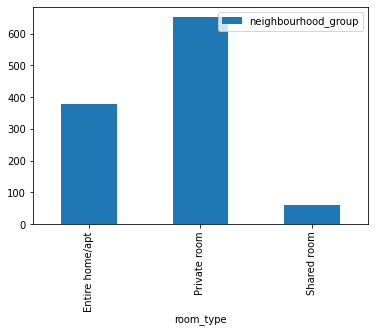

In [134]:
# bar chart showing the number of room types in the Bronx
ques_10 = air_bnb[(air_bnb['neighbourhood_group'] == 'Bronx')]

ques_10[['neighbourhood_group', 'room_type']].groupby('room_type').count().plot.bar()

# Room types down below

# Final Conclusion

In this cell, write your final conclusion for each of the questions asked.

Also, if you uncovered some more details that were not asked above, please discribe them here.

-- Add your conclusion --

In [ ]:
# Question 1

# Question 2

# Question 3

# Question 4

# Question 5

# Question 6

# Question 7

# Question 8

# Question 9

# Question 10


